# DATA INFORMATION
   The data gives the information about a company which has their sales before and after digital marketing for different Regions and Managers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [2]:
dt=pd.read_csv("Sales_add.csv")

In [3]:
dt.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
dt.shape

(22, 5)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [6]:
dt.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

No null values present

In [7]:
dt.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


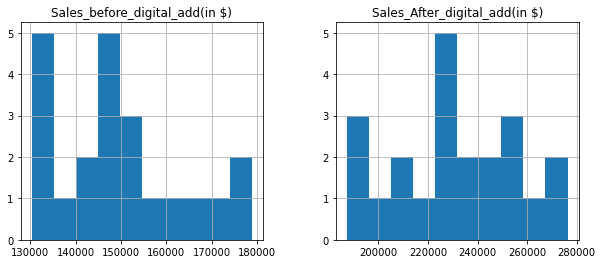

In [8]:
histogram=dt.select_dtypes(include=["object","int64"])
histogram.hist(figsize=(10,4))
plt.show()

* From the histogram it is inferred that sales after digital add is normally distributed.
* Where as sales before add is right skewed. 

##  1.The company wishes to clarify whether there is any increase in sales after stepping into digital marketing. Carry out a study.

## Testing the hypothesis

### This is carried out through paired sample t-test  
    
### H0(Null Hypothesis) : There is no increase in sales after stepping into digital marketing
### H1(Alternate Hypothesis): There is an increase in sales after stepping into digital marketing

In [9]:
from scipy import stats
ttest,pval=stats.ttest_rel(dt["Sales_before_digital_add(in $)"],dt["Sales_After_digital_add(in $)"], axis=0, nan_policy='propagate', alternative='less')
print("p value is",pval)
if pval<0.05:
    print("Reject Null Hypothesis i.e there is an increase in sales after stepping into digital marketing ")
else:
    print("Accept Null Hypothesis")
    

p value is 3.168333502287889e-11
Reject Null Hypothesis i.e there is an increase in sales after stepping into digital marketing 


* Here the null hypothesis is rejected 
* The test indicates that there is an increase in sales after stepping into digital marketing

## 2. The company needs to check whether there is any dependency between the features “Region” and “Manager”.Carry out a study.

## Testing the hypothesis

### This is carried out through chi square test for inpendence (chi square contingency test )

### H0(Null Hypothesis) : The features “Region” and “Manager” are independent
### H1(Alternate Hypothesis) : The features “Region” and “Manager” are dependent

In [10]:
dt[["Region","Manager"]].nunique()

Region     3
Manager    3
dtype: int64

In [11]:
#Finding out categories in "Region"
dt["Region"].unique()

array(['Region - A', 'Region - B', 'Region - C'], dtype=object)

In [12]:
#Finding out categories in "Manager"
dt["Manager"].unique()

array(['Manager - A', 'Manager - C', 'Manager - B'], dtype=object)

In [13]:
#Assigning value to "Manager" and "Region" categories
Manager_Number={'Manager - A':1, 'Manager - B':2, 'Manager - C':3}
Region_Number={'Region - A':1,'Region - B':2,'Region - C':3}

In [14]:
#Forming a list for Manager_Number
manager=[Manager_Number[item] for item in dt.Manager]
manager

[1, 3, 1, 2, 2, 2, 3, 1, 3, 2, 3, 1, 1, 1, 1, 2, 3, 2, 1, 2, 1, 3]

In [15]:
#Forming a list for Region_Number
region=[Region_Number[value] for value in dt.Region]
region

[1, 1, 2, 2, 3, 1, 3, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 3, 2, 1, 2, 1]

In [16]:
#Adding the list as columns into the given data
dt["region"]=region
dt["manager"]=manager
dt

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $),region,manager
0,Month-1,Region - A,Manager - A,132921,270390,1,1
1,Month-2,Region - A,Manager - C,149559,223334,1,3
2,Month-3,Region - B,Manager - A,146278,244243,2,1
3,Month-4,Region - B,Manager - B,152167,231808,2,2
4,Month-5,Region - C,Manager - B,159525,258402,3,2
5,Month-6,Region - A,Manager - B,137163,256948,1,2
6,Month-7,Region - C,Manager - C,130625,222106,3,3
7,Month-8,Region - A,Manager - A,131140,230637,1,1
8,Month-9,Region - B,Manager - C,171259,226261,2,3
9,Month-10,Region - C,Manager - B,141956,193735,3,2


In [17]:
# Removing the columns other than the formed list of "Region" and "Manager"
dt1=dt.drop(["Month","Region","Manager","Sales_before_digital_add(in $)","Sales_After_digital_add(in $)"],axis=1)
dt1

,region,manager
0,1,1
1,1,3
2,2,1
3,2,2
4,3,2
5,1,2
6,3,3
7,1,1
8,2,3
9,3,2


In [18]:
#Carrying out chi2 test to find the dependency
from scipy.stats import chi2_contingency
stat,p,dof,expected=chi2_contingency(dt1)
print("stat=%.3f,p=%.3f" % (stat,p))
if p > 0.05:
    print("They are independent")
else:
    print("They are dependent")


stat=7.288,p=0.998
They are independent


* Here Null hypothesis is accepted
* The chi2 test suggests that the features "Region" and "Manager" are independent.